# RoBERTa Base - Augmented Data - All Data

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
datasetPath = "/content/drive/MyDrive/Thesis/Code/GenerativeDataAugmentation/Coba14/filteredData/augJoin3.csv"
dataset = pd.read_csv(datasetPath, index_col=0, encoding="utf-8")
dataset.rename(columns={'text' : 'Text', 'emotion' : 'Emotion'}, inplace=True)

In [3]:
dataset

,Text,Emotion
0,im not talking about a studio. im talking abou...,anger
1,. . . Wait a fucking second,anger
2,"Oh [NAME], someone did it already, and it was ...",surprise
3,see im on here having fun meming on all yall b...,joy
4,Yeah - thanks - I vaguely remember this. I won...,surprise
...,...,...
78005,Soon: Mass death of pink-skinned Aussies.,disgust
78006,Ohhh sorry. I got it now. Thanks bruv,joy
78007,"Don't listen to the idiot, we love your posts!",anger
78008,i can feel more emotional now,sadness


In [4]:
encoded_dict = {'anger':0, 'fear':1, 'joy':2, 'disgust':3, 'sadness':4, 'surprise':5}
dataset['Emotion'] = dataset.Emotion.map(encoded_dict)

In [5]:
dataset

,Text,Emotion
0,im not talking about a studio. im talking abou...,0
1,. . . Wait a fucking second,0
2,"Oh [NAME], someone did it already, and it was ...",5
3,see im on here having fun meming on all yall b...,2
4,Yeah - thanks - I vaguely remember this. I won...,5
...,...,...
78005,Soon: Mass death of pink-skinned Aussies.,3
78006,Ohhh sorry. I got it now. Thanks bruv,2
78007,"Don't listen to the idiot, we love your posts!",0
78008,i can feel more emotional now,4


In [6]:
import numpy as np
training_data, validation_data, test_data = np.split(dataset.sample(frac=1), [int(.8*len(dataset)), int(.9*len(dataset))])

In [7]:
training_data = training_data.reset_index().drop(['index'], axis=1)

In [8]:
training_data

,Text,Emotion
0,"Fuck it, im paying the premium -- 15% risk in ...",3
1,This is disgusting. No one should act like thi...,3
2,what a surprise i never saw coming,5
3,And if that's the case then there is no helpin...,3
4,The best part: he was 5 foot 9,5
...,...,...
62403,Stupidly stubborn / stubbornly stupid,0
62404,i actually read it im left feeling disillusion...,4
62405,Why are you making questionable jokes at work?...,0
62406,i havent felt much like talking nothing bad ju...,2


In [9]:
training_data['Emotion'].value_counts()

2    11850
4    11304
1    10402
0    10370
5     9835
3     8647
Name: Emotion, dtype: int64

In [10]:
validation_data = validation_data.reset_index().drop(['index'], axis=1)

In [11]:
validation_data

,Text,Emotion
0,There is a reason why the Vikings are the 2nd ...,5
1,Oh my goodness. This is the worst thing I read...,3
2,This is the worst I've ever seen. It really is,0
3,de grasse has a very noticeable asymmetry too,3
4,i think its possible that i feel skeptical ab...,1
...,...,...
7796,i didnt feel there was anything special about it,2
7797,How do ya feel about [NAME] being in your back...,5
7798,im feeling quite well acquainted with,2
7799,i remember feeling so terrified that i would ...,1


In [12]:
validation_data['Emotion'].value_counts()

2    1448
4    1409
0    1315
5    1290
1    1279
3    1060
Name: Emotion, dtype: int64

In [13]:
test_data = test_data.reset_index().drop(['index'], axis=1)

In [14]:
test_data

,Text,Emotion
0,Usually its better just to ignore the dude who...,3
1,i feel reluctant and awkward on this one,1
2,i have felt the need to write out my sometimes...,0
3,Yep. Seriously painful to read,4
4,My jaw dropped,5
...,...,...
7796,Don't know how that was missed. Tragic really....,4
7797,Okay. The wall that he's mentioning. What wall...,5
7798,His Batman/TMNT book is a really fun read with...,2
7799,Just get the fuck out.,0


In [15]:
test_data['Emotion'].value_counts()

4    1455
2    1446
1    1356
0    1302
5    1205
3    1037
Name: Emotion, dtype: int64

# Model 

In [16]:
training_data.shape, test_data.shape, validation_data.shape

((62408, 2), (7801, 2), (7801, 2))

In [17]:
!pip install transformers==4.18.0
import transformers
print(transformers.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.0 MB 29.4 MB/s 
     |████████████████████████████████| 6.6 MB 65.8 MB/s 
     |████████████████████████████████| 182 kB 73.2 MB/s 
     |████████████████████████████████| 880 kB 69.8 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=cdfdd3ee31c6663bce886dae1f52d74940fb3785f4d6002d5e0bdeb1fc3cfc3e
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
4.18.0


In [18]:
# Tentukan pre-trained model yang akan digunakan untuk fine-tuning
# Daftar model dapat ditemukan pada https://huggingface.co

PRE_TRAINED_MODEL = 'roberta-base'

In [19]:
from transformers import RobertaTokenizer

bert_tokenizer = RobertaTokenizer.from_pretrained(PRE_TRAINED_MODEL)  # Load tokenizer dari pre-trained model

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [20]:
# Contoh Tokenisasi

id_data = 5 # Mengambil data indeks ke-5 pada dataframe

print('Kalimat:', test_data.Text[id_data])
print('BERT Tokenizer:', bert_tokenizer.tokenize(test_data.Text[id_data]))

Kalimat: I high key thought this same thing then it was sad boy hours when I broke things up
BERT Tokenizer: ['I', 'Ġhigh', 'Ġkey', 'Ġthought', 'Ġthis', 'Ġsame', 'Ġthing', 'Ġthen', 'Ġit', 'Ġwas', 'Ġsad', 'Ġboy', 'Ġhours', 'Ġwhen', 'ĠI', 'Ġbroke', 'Ġthings', 'Ġup']


In [21]:
# Contoh input formatting untuk BERT. Input formating dapat menggunakan fungsi `encode_plus`

bert_input = bert_tokenizer.encode_plus(
    training_data.Text[id_data],    # Sample kalimat                
    add_special_tokens = True,      # Tambahkan token [CLS] pada awal kalimat dan token [SEP] pada akhir kalimat
    padding = 'max_length',         # Tambahkan padding ke max_length menggunakan token [PAD] jika kalimat kurang dari max_length
    truncation = 'longest_first',   # Truncate jika kalimat lebih dari max_length
    max_length = 80,                # Tentukan max_length dari seluruh kalimat
    return_attention_mask = True,   # Mengembalikan nilai attention mask
    return_token_type_ids =True     # Mengembalikan nilai token type id (segment embedding)
    )

# Fungsi `encode_plus` mengembalikan 3 nilai: input_ids, token_type_ids, attention_mask
bert_input.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [22]:
print('Kalimat\t\t:', training_data.Text[id_data])                                      # Data asli
print('Tokenizer\t:', bert_tokenizer.convert_ids_to_tokens(bert_input['input_ids']))    # Hasil input formatting + tokenizer
print('Input IDs\t:', bert_input['input_ids'])                                          # Input IDs : indeks token pada vocabulary tokenizer
print('Token Type IDs\t:', bert_input['token_type_ids'])                                # Token type IDs : menunjukkan urutan kalimat pada sequence (segment embedding)
print('Attention Mask\t:', bert_input['attention_mask'])                                # Attention mask : mengembalikan nilai [0,1]. 1 artinya token yang di masking, 0 token yang tidak di masking (diabaikan)

Kalimat		: Wow, you’re so generous with other people’s money.
Tokenizer	: ['<s>', 'Wow', ',', 'Ġyou', 'âĢ', 'Ļ', 're', 'Ġso', 'Ġgenerous', 'Ġwith', 'Ġother', 'Ġpeople', 'âĢ', 'Ļ', 's', 'Ġmoney', '.', '</s>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']
Input IDs	: [0, 23692, 6, 47, 17, 27, 241, 98, 9256, 19, 97, 82, 17, 27, 29, 418, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [23]:
import random
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

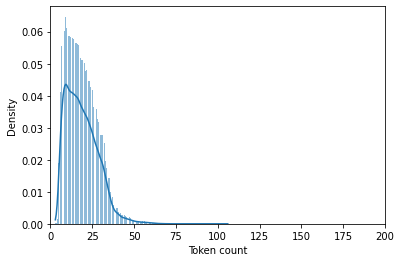

In [24]:
'''
Ada banyak cara untuk menentukan max_length
Intuisinya adalah kita tidak ingin memotong kalimat, atau terlalu banyak menambahkan padding (komputasi lebih lama)
Contoh ini, max_lenght ditentukan dari distribusi token pada dataset 
'''
token_lens = []

for txt in training_data.Text:
  tokens = bert_tokenizer.encode(txt)
  token_lens.append(len(tokens))

sns.histplot(token_lens, kde=True, stat='density', linewidth=0)
plt.xlim([0, 200]);
plt.xlabel('Token count');

In [25]:
# Dapat dilihat dari grafik diatas, sebagian besar kalimat tampaknya berisi kurang dari 80 token
# Maka, tentukan max_length adalah 80

MAX_LEN = 80

In [26]:
# Buat fungsi untuk menggabungkan langkah tokenisasi, menambahkan special tokens untuk keseluruhan data sebagai input formatting ke model BERT
def convert_example_to_feature(sentence):  
  return bert_tokenizer.encode_plus(
      sentence, 
      add_special_tokens = True, 
      padding = 'max_length',
      truncation = 'longest_first',
      max_length = MAX_LEN, 
      return_attention_mask = True, 
      return_token_type_ids=True
    )

In [27]:
# Buat fungsi untuk memetakan input hasil input formatting agar sesuai dengan model BERT
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,               # Sebagai token embedding
      "token_type_ids": token_type_ids,     # Sebagai segment embedding
      "attention_mask": attention_masks,    # Sebagai filter informasi mana yang kalkulasi oleh model
  }, label

In [28]:
!pip install tensorflow==2.8.0
import tensorflow as tf
print(tf.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 668.3 MB 17 kB/s 
     |████████████████████████████████| 462 kB 31.9 MB/s 
     |████████████████████████████████| 1.4 MB 87.2 MB/s 
     |████████████████████████████████| 5.8 MB 65.4 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully uninstalled tensorflow-2.9.2
2.8.0


In [29]:
# Buat fungsi untuk iterasi pada setiap kalimat pada keseluruhan data
def encode(data):
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []
    
  for sentence, label in data.to_numpy():

    bert_input = convert_example_to_feature(sentence)
  
    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([label])

  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

In [30]:
# Tentukan nilai hyperparamter untuk fine-tuning
EPOCHS = 5
BATCH_SIZE = 32
LEARNING_RATE = 1e-5

In [31]:
# Lakukan input formatting menggunakan fungsi sebelumnya pada data keseluruhan data
train_encoded = encode(training_data).batch(BATCH_SIZE)
test_encoded = encode(test_data).batch(BATCH_SIZE)
val_encoded = encode(validation_data).batch(BATCH_SIZE)

In [32]:
'''
BERT untuk tugas klasifikasi sequence (teks) dengan menambahkan linear layer di atas pooled output untuk pengklasifikasi
https://huggingface.co/docs/transformers/model_doc/bert#transformers.TFBertForSequenceClassification
'''

from transformers import TFRobertaForSequenceClassification

# Load model
bert_model = TFRobertaForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL, num_labels=6)

Downloading:   0%|          | 0.00/627M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [33]:
# Tentukan optimizer dengan learning rate tertentu
# Paper aslinya menggunakan Adam Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

# Karena tidak menggunakan one-hot vectors, sehingga loss function dapat menggunakan sparse categorical cross entropy
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

# Compile model
bert_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [34]:
%%time
bert_history = bert_model.fit(train_encoded, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=val_encoded)

Epoch 1/5
1951/1951 [==============================] - 1040s 523ms/step - loss: 0.7193 - accuracy: 0.7502 - val_loss: 0.5381 - val_accuracy: 0.8164
Epoch 2/5
1951/1951 [==============================] - 1018s 522ms/step - loss: 0.5136 - accuracy: 0.8238 - val_loss: 0.5305 - val_accuracy: 0.8204
Epoch 3/5
1951/1951 [==============================] - 1018s 522ms/step - loss: 0.4510 - accuracy: 0.8438 - val_loss: 0.5296 - val_accuracy: 0.8214
Epoch 4/5
1951/1951 [==============================] - 1018s 522ms/step - loss: 0.4041 - accuracy: 0.8600 - val_loss: 0.5349 - val_accuracy: 0.8259
Epoch 5/5
1951/1951 [==============================] - 1019s 522ms/step - loss: 0.3601 - accuracy: 0.8736 - val_loss: 0.5853 - val_accuracy: 0.8241
CPU times: user 55min 17s, sys: 10min 35s, total: 1h 5min 52s
Wall time: 1h 25min 36s


In [35]:
# Buat fungsi untuk plotting hasil training
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

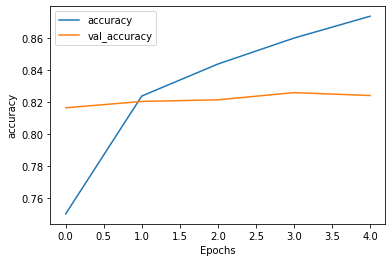

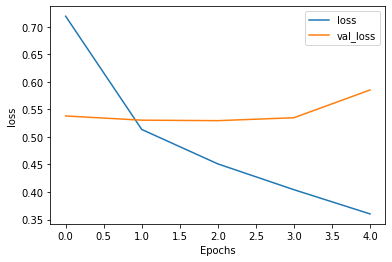

In [36]:
plot_graphs(bert_history, 'accuracy')
plot_graphs(bert_history, 'loss')

In [37]:
print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(EPOCHS):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, bert_history.history['accuracy'][i], bert_history.history['loss'][i], bert_history.history['val_accuracy'][i], bert_history.history['val_loss'][i]))


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.750176 	   0.719290 	   0.816434 	   0.538111
       2   0.823789 	   0.513577 	   0.820408 	   0.530472
       3   0.843770 	   0.451024 	   0.821433 	   0.529591
       4   0.859970 	   0.404148 	   0.825920 	   0.534903
       5   0.873622 	   0.360149 	   0.824125 	   0.585339


In [38]:
score = bert_model.evaluate(test_encoded)

print("Test Accuracy:", score[1])

244/244 [==============================] - 42s 172ms/step - loss: 0.6026 - accuracy: 0.8177
Test Accuracy: 0.8177157044410706


In [39]:
predicted_raw = bert_model.predict(test_encoded)

In [40]:
y_pred = np.argmax(predicted_raw['logits'], axis=1)
y_true = np.array(test_data['Emotion'])

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

accuracy_score(y_true, y_pred)

0.8177156774772465

In [42]:
confusion_matrix(y_true, y_pred)

array([[1009,   34,   34,  116,   54,   55],
       [  36, 1215,   12,   41,   26,   26],
       [  27,   10, 1298,   10,   29,   72],
       [ 152,   48,   30,  702,   44,   61],
       [  79,   54,   51,   50, 1179,   42],
       [  50,   61,   74,   29,   15,  976]])

In [43]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1302
           1       0.85      0.90      0.87      1356
           2       0.87      0.90      0.88      1446
           3       0.74      0.68      0.71      1037
           4       0.88      0.81      0.84      1455
           5       0.79      0.81      0.80      1205

    accuracy                           0.82      7801
   macro avg       0.81      0.81      0.81      7801
weighted avg       0.82      0.82      0.82      7801

